In [1]:
library(Seurat)
# library(SeuratDisk)
library(Signac)
library(EnsDb.Hsapiens.v86)
library(dplyr)
library(ggplot2)
library(bedr)
library(Biostrings)
# library(SeuratPipe)
library(scales)
library(reshape2)
library(Hmisc)
library(tidyr)
library(patchwork)
library(readr)

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.11.0-CAPI-1.17.0
and GEOS at installation 3.10.2-CAPI-1.16.0differ”
Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required pack

In [ ]:
set.seed(12345678)

# Load files

## Load Seurat file

In [ ]:
#h5_name = "/home/vsevim/prj/tf/CATATAC_4/analysis/secondary/condition_07/seurat/CATATAC_4_condition_07.h5seurat"
seurat_w_doublet_scores <- readRDS(h5_name)

Validating h5Seurat file



## Load protospacer file

In [ ]:
#protosp_path = "/home/vsevim/prj/tf/CATATAC_4/analysis/primary/condition_07/resources/protospacers_4set.tsv"
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [ ]:
genes_to_plot  = unique(df_protosp$X.TargetGene)
select_ntctl   = grepl("NTCTL", genes_to_plot) | grepl("NTCTRL", genes_to_plot)
genes_to_plot  = genes_to_plot[!select_ntctl]
genes_to_plot

[1] "GATA5"   "MEOX1"   "NEUROG2"

# More QC

In [ ]:
n_doublets <- sum(seurat_w_doublet_scores@meta.data$predicted_doublets)
n_cells    <- nrow(seurat_w_doublet_scores@meta.data)
cat("Doublets detected:", n_doublets, "out of", n_cells, "cells.")

Doublets detected: 0 out of 14977 cells.

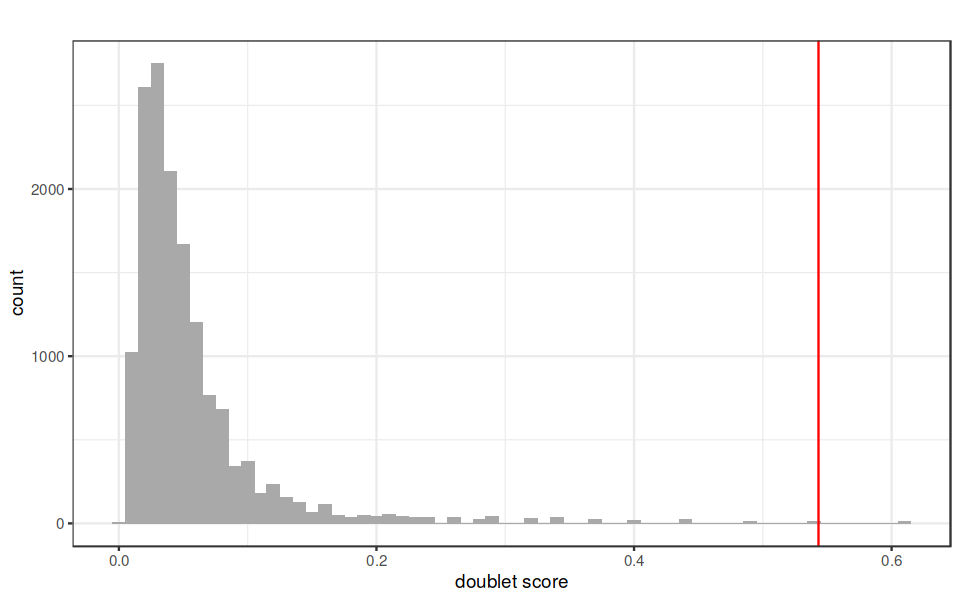

In [ ]:
options(repr.plot.width=8, repr.plot.height=5)
tresh.value <- quantile(seurat_w_doublet_scores@meta.data$doublet_scores, 0.999) # set this value according 
     # to the output log form scrublet estimated detectable doublet fraction
#plt_scrublet_hist(seurat_w_doublet_scores, tresh.value = tresh.value, bin.width = 0.01)

In [ ]:
klet_classes = c("singlet", "doublet")
table(klet_classes[seurat_w_doublet_scores$predicted_doublets+1])


singlet 
  14977 

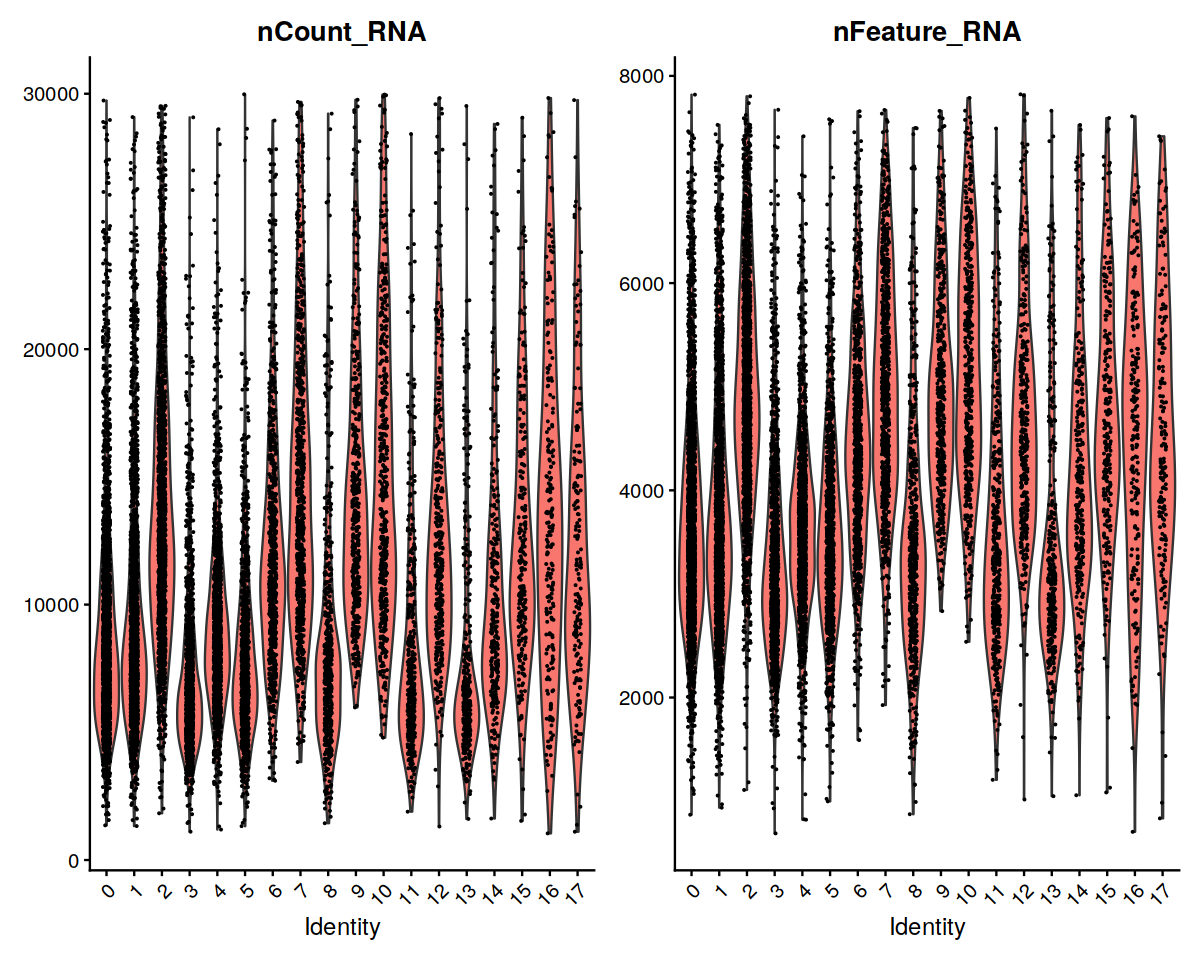

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)
VlnPlot(
    seurat_w_doublet_scores, 
    features = c('nCount_RNA', 'nFeature_RNA'),
    split.by = 'predicted_doublets'
)

In [ ]:
head(seurat_w_doublet_scores)

nCount_ATAC nFeature_ATAC nCount_RNA nFeature_RNA
AAACAGCCACATTGCA-1 25299       11246          9715      3795        
AAACAGCCAGGCATGA-1 19578        9030          9741      3828        
AAACAGCCAGTTATGT-1 16725        7883          9838      3917        
AAACAGCCATAAACCT-1  7499        3850         10174      4230        
AAACAGCCATGGCCTG-1 30632       13580         25032      6932        
AAACAGCCATTAAAGG-1 40964       17577         25600      6795        
AAACAGCCATTATGAC-1 13661        6799         12139      4889        
AAACATGCACAAAGGT-1 22404       10080         10854      4490        
AAACATGCACGAATCC-1 17562        8577          5944      3036        
AAACATGCAGTTGCGT-1  6882        3472          4209      2215        
                   orig.ident                     percent.mt nucleosome_signal
AAACAGCCACATTGCA-1 CATATAC_CATATAC_4_condition_07 14.616572  0.6073858        
AAACAGCCAGGCATGA-1 CATATAC_CATATAC_4_condition_07 15.172980  0.7158590        
AAACAGCCAGTTATGT-1 CATATAC_CATATAC_4_condition_07 14.006912  0.6650564        
AAACAGCCATAAACCT-1 CATATAC_CATATAC_4_condition_07 13.701592  0.7401392        
AAACAGCCATGGCCTG-1 CATATAC_CATATAC_4_condition_07 10.254874  0.7611895        
AAACAGCCATTAAAGG-1 CATATAC_CATATAC_4_condition_07  6.789062  0.6228087        
AAACAGCCATTATGAC-1 CATATAC_CATATAC_4_condition_07  7.447071  0.7144593        
AAACATGCACAAAGGT-1 CATATAC_CATATAC_4_condition_07 10.761010  0.7794180        
AAACATGCACGAATCC-1 CATATAC_CATATAC_4_condition_07  6.527591  0.8377022        
AAACATGCAGTTGCGT-1 CATATAC_CATATAC_4_condition_07  5.393205  0.6479218        
                   nucleosome_percentile TSS.enrichment TSS.percentile
AAACAGCCACATTGCA-1 0.12                  4.357402       0.35          
AAACAGCCAGGCATGA-1 0.47                  4.226580       0.26          
AAACAGCCAGTTATGT-1 0.28                  4.647465       0.56          
AAACAGCCATAAACCT-1 0.57                  4.266134       0.29          
AAACAGCCATGGCCTG-1 0.65                  4.906334       0.74          
AAACAGCCATTAAAGG-1 0.15                  4.491732       0.45          
AAACAGCCATTATGAC-1 0.47                  4.841693       0.70          
AAACATGCACAAAGGT-1 0.71                  5.299592       0.89          
AAACATGCACGAATCC-1 0.84                  3.923764       0.10          
AAACATGCAGTTGCGT-1 0.22                  4.243376       0.27          
                   nCount_SCT nFeature_SCT doublet_scores predicted_doublets
AAACAGCCACATTGCA-1  9542      3794         0.03880804     0                 
AAACAGCCAGGCATGA-1  9570      3828         0.05855856     0                 
AAACAGCCAGTTATGT-1  9631      3916         0.06467181     0                 
AAACAGCCATAAACCT-1  9843      4230         0.05077805     0                 
AAACAGCCATGGCCTG-1  9746      4493         0.12858313     0                 
AAACAGCCATTAAAGG-1  9972      4420         0.03716216     0                 
AAACAGCCATTATGAC-1 10292      4887         0.11176041     0                 
AAACATGCACAAAGGT-1 10104      4489         0.02234927     0                 
AAACATGCACGAATCC-1  8134      3039         0.08223117     0                 
AAACATGCAGTTGCGT-1  8230      2377         0.05715552     0                 
                   ATAC_snn_res.0.8 seurat_clusters SCT.weight ATAC.weight
AAACAGCCACATTGCA-1 0                0               0.6200541  0.3799459  
AAACAGCCAGGCATGA-1 2                2               0.5045238  0.4954762  
AAACAGCCAGTTATGT-1 4                6               0.4961311  0.5038689  
AAACAGCCATAAACCT-1 2                2               0.5817160  0.4182840  
AAACAGCCATGGCCTG-1 5                6               0.4812511  0.5187489  
AAACAGCCATTAAAGG-1 14               17              0.5000000  0.5000000  
AAACAGCCATTATGAC-1 2                2               0.5730475  0.4269525  
AAACATGCACAAAGGT-1 0                6               0.5231738  0.4768262  
AAACATGCACGAATCC-1 0                5               0.5366637  0.4633363  
AAACATGCAGTTG

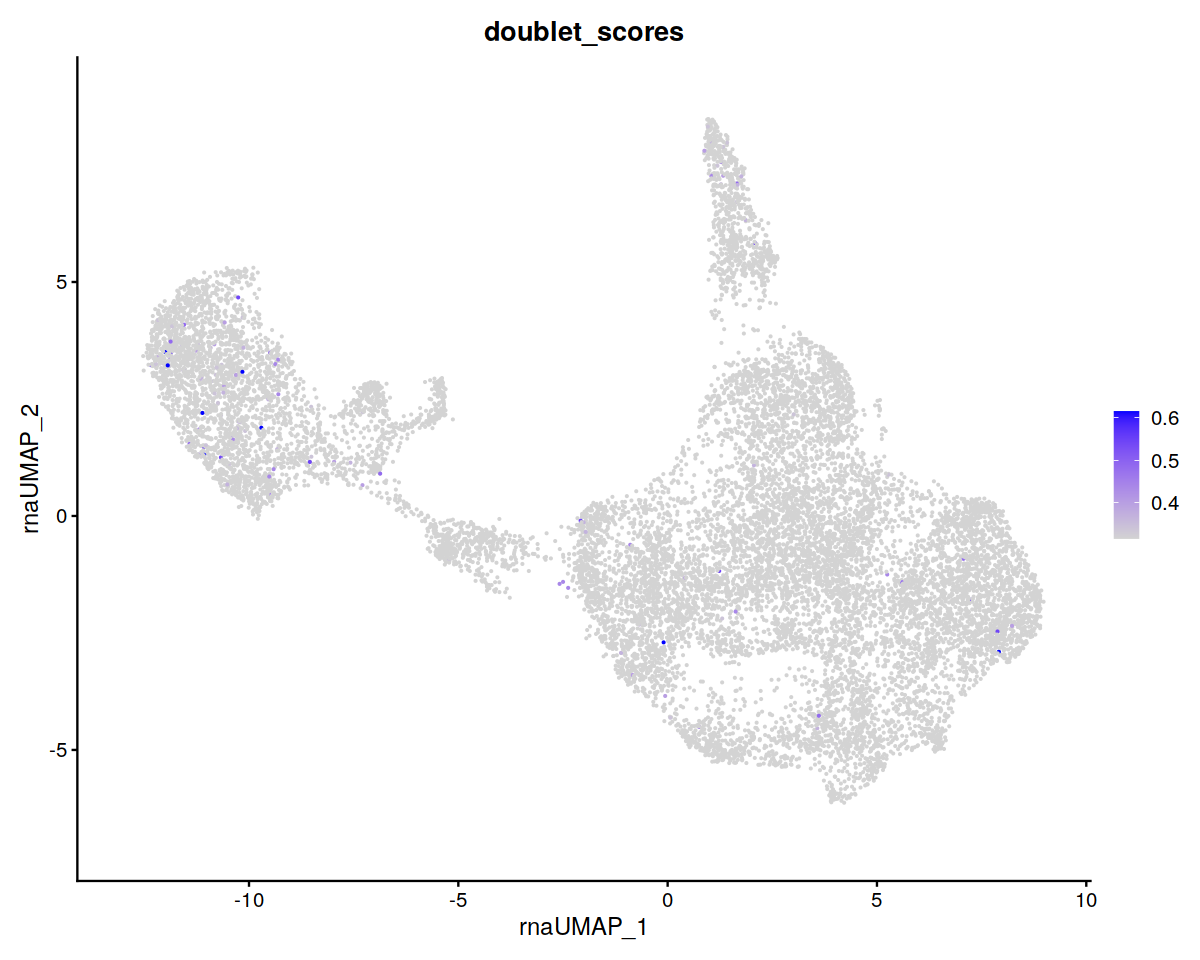

In [ ]:
FeaturePlot(
    seurat_w_doublet_scores, 
    features = 'doublet_scores', 
    min.cutoff = "q99", 
    reduction = 'umap.rna'
) 

## Check if clustering is driven by UMI counts (not relevant for CKD)

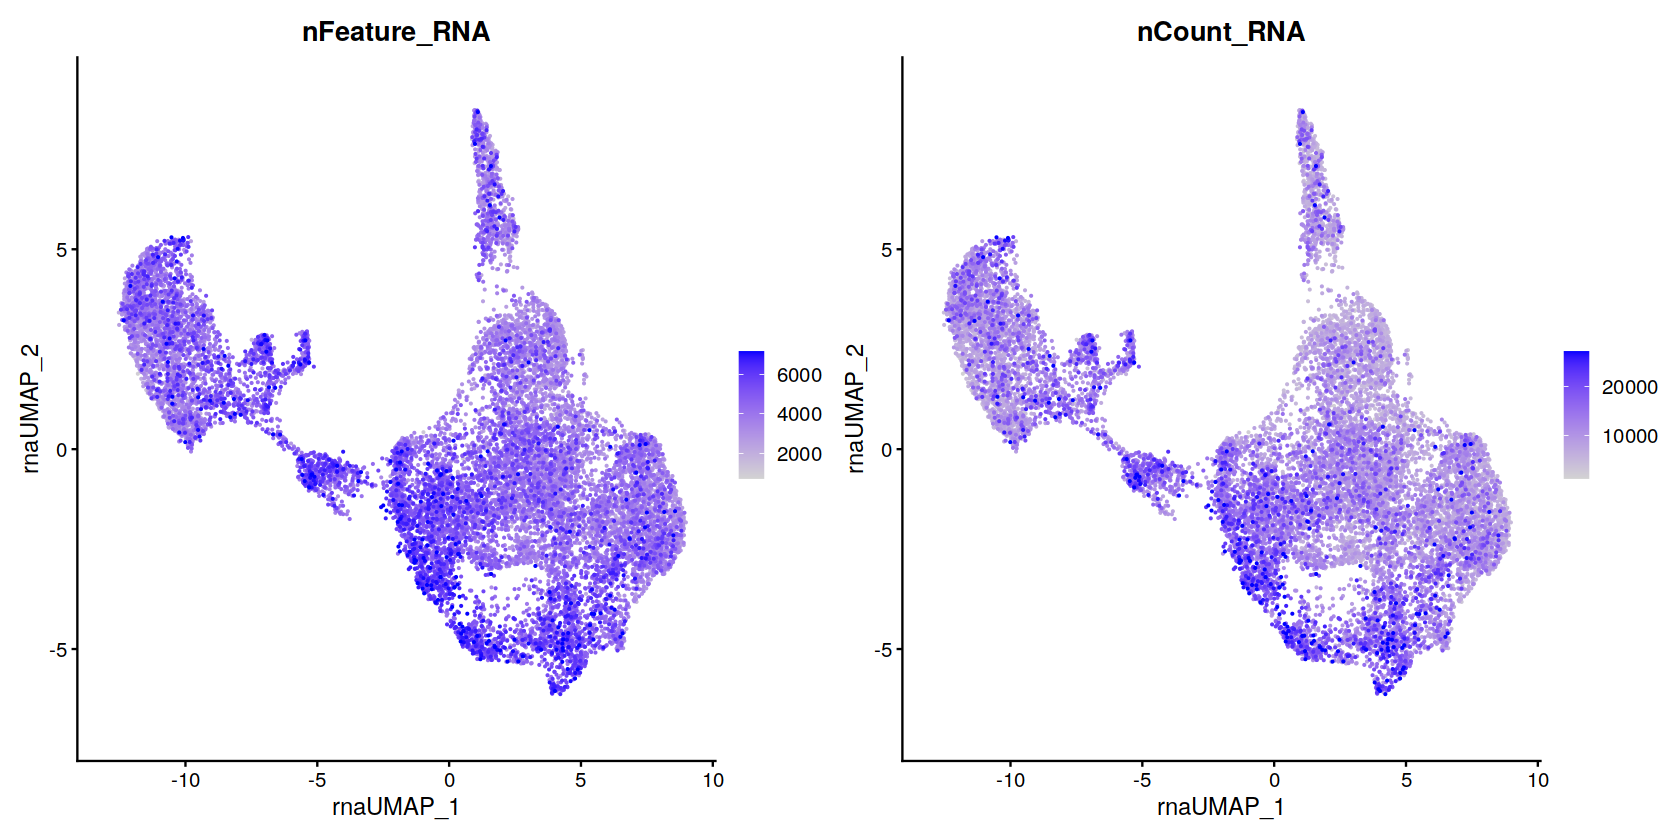

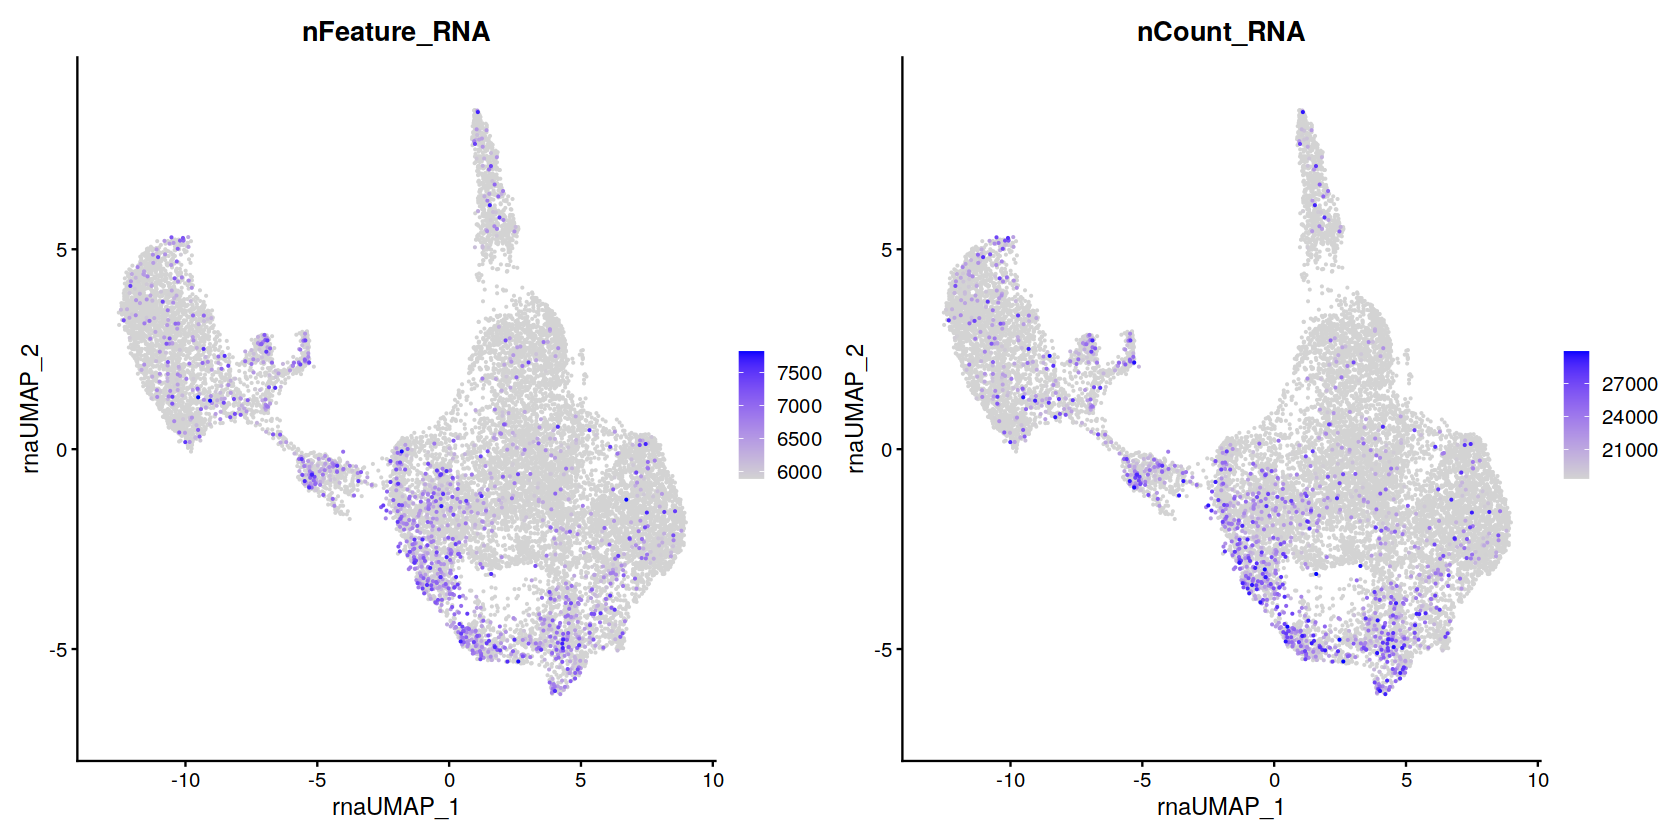

In [ ]:
options(repr.plot.width=14, repr.plot.height=7)
FeaturePlot(
    seurat_w_doublet_scores, 
    reduction= "umap.rna", 
    features = c("nFeature_RNA", "nCount_RNA"), 
    min.cutoff = NA, 
    max.cutoff = "q99", 
    ncol = 2, 
    order=T
)
FeaturePlot(
    seurat_w_doublet_scores, 
    reduction= "umap.rna", 
    features = c("nFeature_RNA", "nCount_RNA"), 
    min.cutoff = "q90", 
    max.cutoff = NA, 
    ncol = 2, 
    order=T
)

In [ ]:
corr_list <- apply(
                    as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings), 2, 
                    function(x) cor.test(x, seurat_w_doublet_scores$nCount_RNA, method="pearson")$estimate
            )

df_corrs <- as.data.frame(corr_list)
colnames(df_corrs) <- c("pearson_r")
df_corrs$PC <- rownames(df_corrs)
df_corrs$PC <- factor(df_corrs$PC, levels = df_corrs$PC)

# x = as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings)$PC_1
# y = seurat_w_doublet_scores$nCount_RNA
# cor.test(x, y, method="pearson")

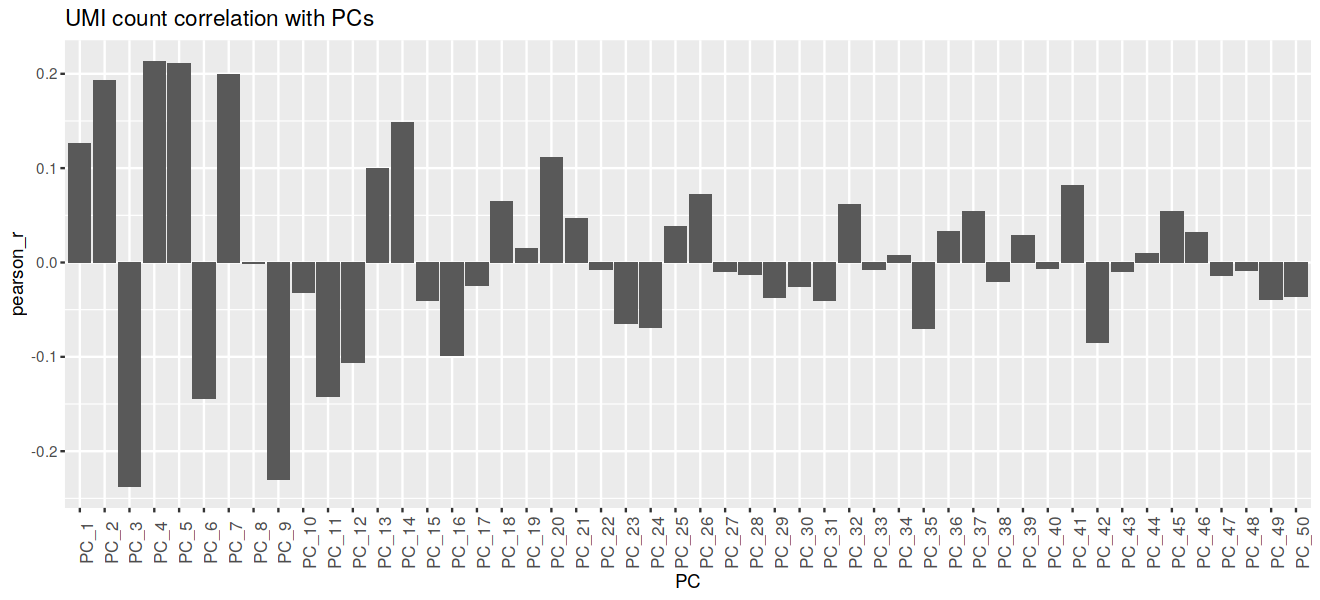

In [ ]:
options(repr.plot.width=11, repr.plot.height=5)
ggplot(df_corrs, aes(x=PC, y=pearson_r)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, size = 10)) +
    labs(title = "UMI count correlation with PCs")
    

## Check if mito reads are driving the clustering

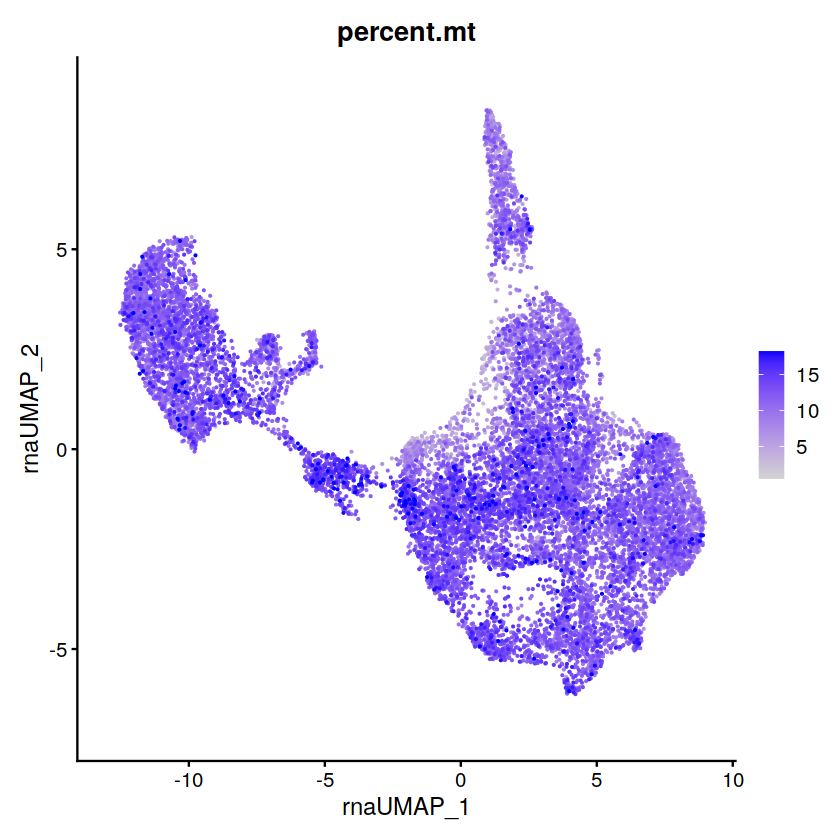

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
FeaturePlot(seurat_w_doublet_scores, reduction= "umap.rna", features = c("percent.mt"), min.cutoff = NA, max.cutoff = "q99", order=T)

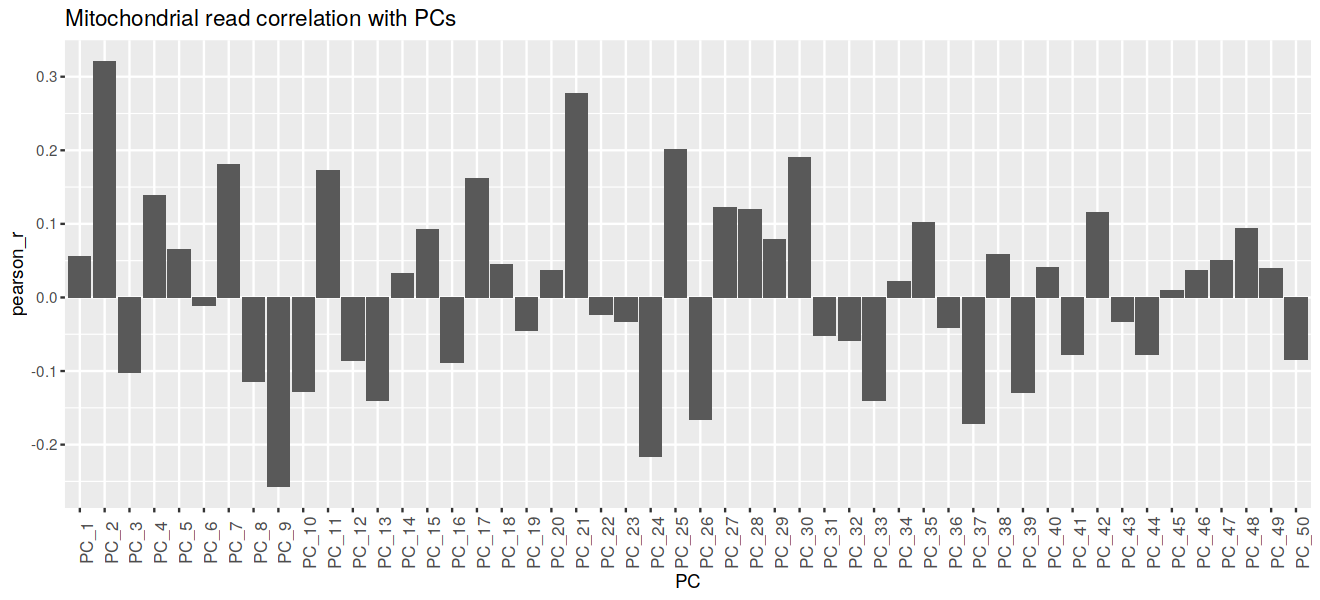

In [ ]:
corr_list <- apply(
                    as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings), 2, 
                    function(x) cor.test(x, seurat_w_doublet_scores$percent.mt, method="pearson")$estimate
            )

df_corrs <- as.data.frame(corr_list)
colnames(df_corrs) <- c("pearson_r")
df_corrs$PC <- rownames(df_corrs)
df_corrs$PC <- factor(df_corrs$PC, levels = df_corrs$PC)

# x = as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings)$PC_1
# y = seurat_w_doublet_scores$percent.mt
# cor.test(x, y, method="pearson")

options(repr.plot.width=11, repr.plot.height=5)
ggplot(df_corrs, aes(x=PC, y=pearson_r)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, size = 10)) +
    labs(title = "Mitochondrial read correlation with PCs")
    

# Filter out multiplets

In [ ]:
#select_singlets = seurat_w_doublet_scores$predicted_doublets == 0
seurat <- subset(seurat_w_doublet_scores, predicted_doublets == 0)

In [ ]:
nrow(seurat@meta.data)
nrow(seurat_w_doublet_scores@meta.data)

[1] 14977

[1] 14977

# SVD

In [ ]:
DefaultAssay(seurat) <- "ATAC"
seurat <- RunTFIDF(seurat)

Performing TF-IDF normalization



In [ ]:
seurat <- FindTopFeatures(seurat, min.cutoff = 'q0')

In [ ]:
seurat <- RunSVD(seurat)

Running SVD

Scaling cell embeddings



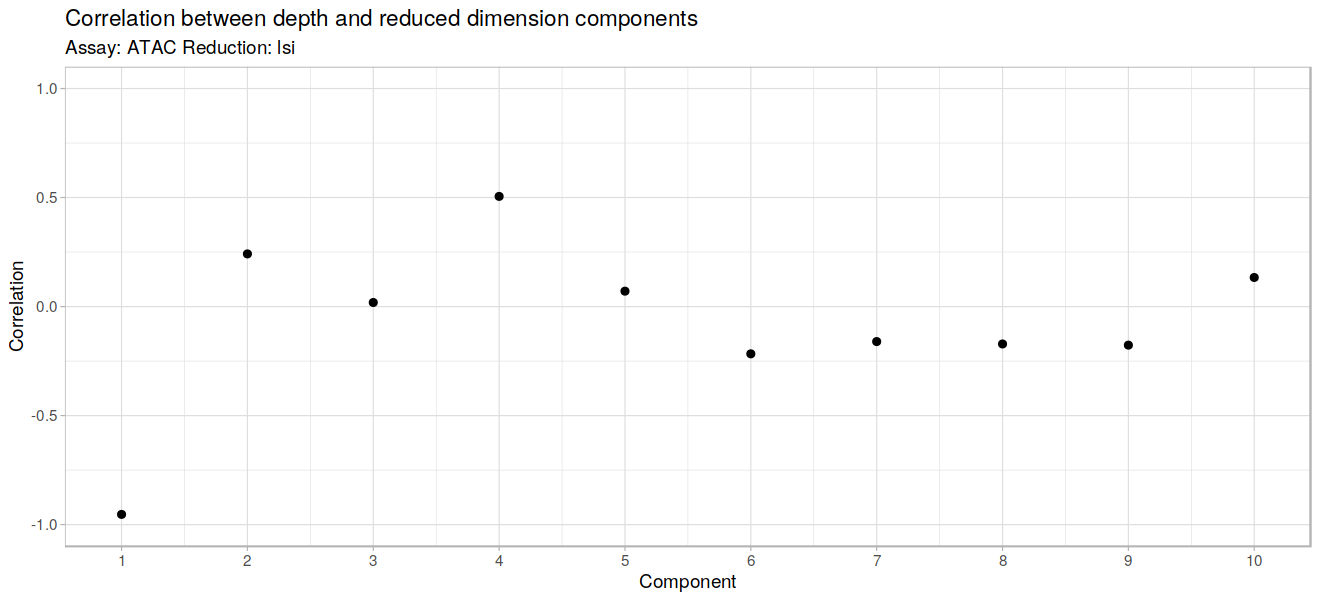

In [ ]:
DepthCor(seurat)

In [ ]:
# We exclude the first dimension as this is typically correlated with sequencing depth
seurat <- RunUMAP(seurat, reduction = 'lsi', dims = 2:50, reduction.name = "umap.atac", reduction.key = "atacUMAP_")

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
10:11:35 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'

10:11:35 Read 14977 rows and found 49 numeric columns

10:11:35 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'

10:11:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:11:36 Writing NN index file to 

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
seurat <- FindNeighbors(object = seurat, reduction = 'lsi', dims = 2:30)
seurat <- FindClusters(object = seurat, verbose = FALSE, algorithm = 3)

Computing nearest neighbor graph

Computing SNN



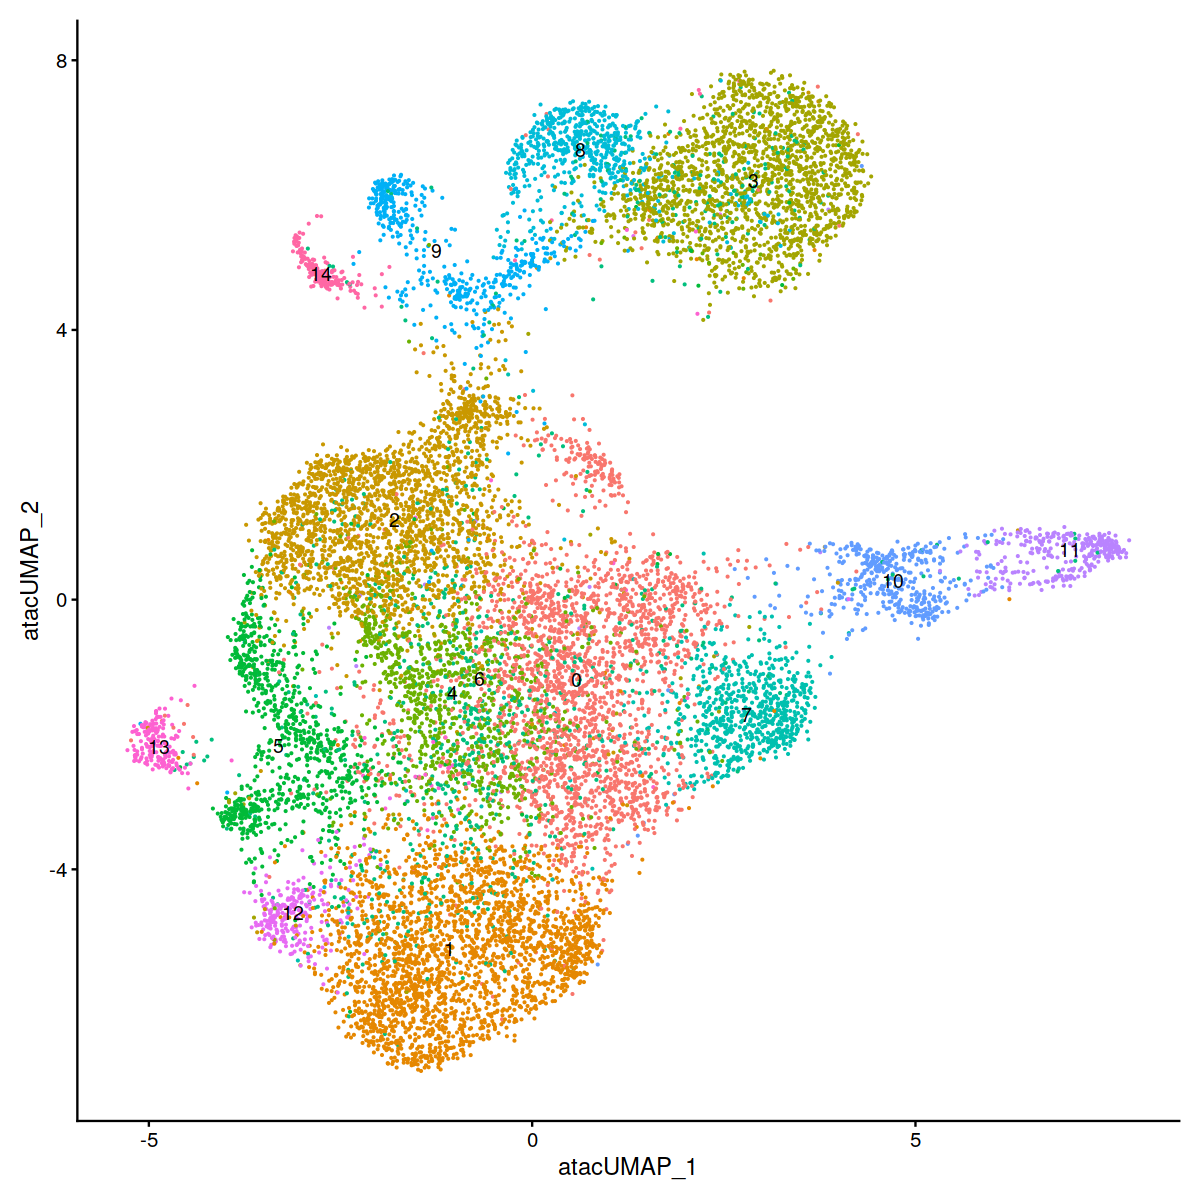

In [ ]:
DimPlot(object = seurat, label = TRUE) + NoLegend()

# RNA+ATAC Joint analysis 

In [ ]:
seurat <- FindMultiModalNeighbors(seurat, reduction.list = list("pca", "lsi"), dims.list = list(1:50, 2:50))
seurat <- RunUMAP(seurat, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
seurat <- FindClusters(seurat, graph.name = "wsnn", algorithm = 3, verbose = FALSE)

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph

10:12:50 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'

10:12:51 Commencing smooth kNN distance calibration using 1 thread

10:12:53 Initializing from normalized Laplacian + noise

10:12:54 Commencing optimization for 200 epochs, with 450094 positive edges

10:13:01 Optimization finished



In [ ]:
DefaultAssay(seurat) <- "SCT"
tf.list <- genes_to_plot
tf.list.2 <- c("NANOG", "POU5F1", "PODXL", "AC003975.1")
options(repr.plot.width=18, repr.plot.height=14)

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: NTCTL"


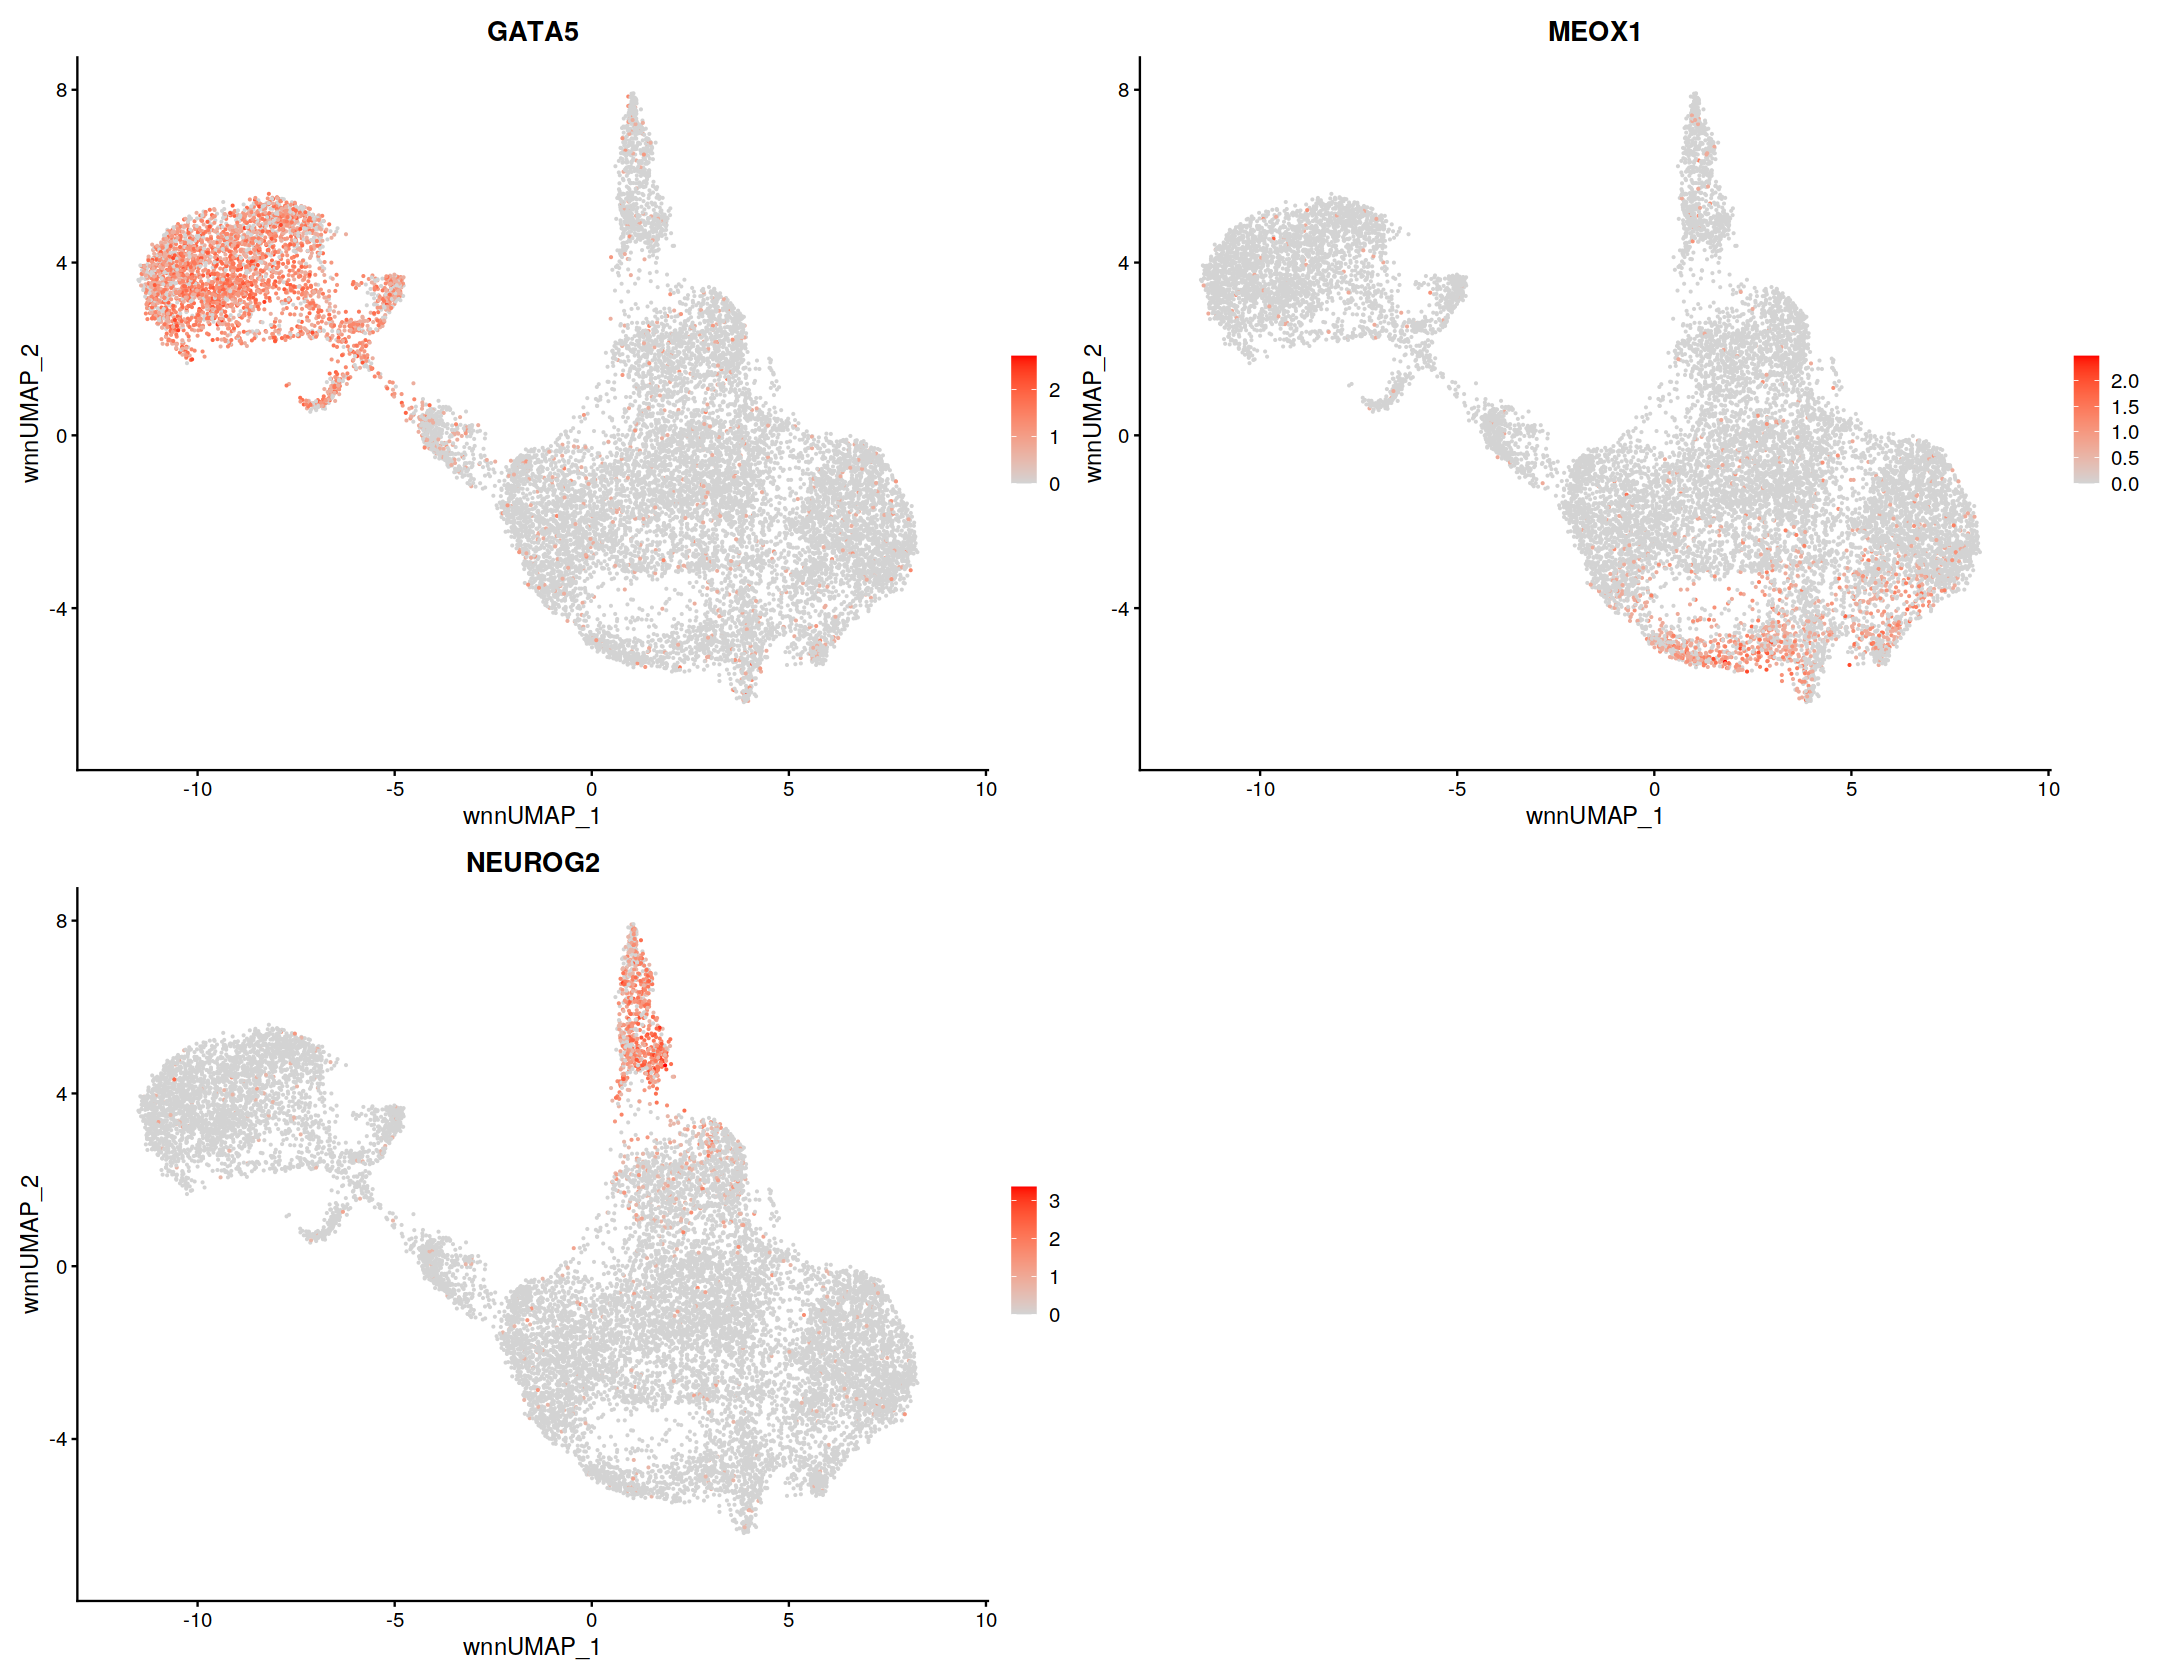

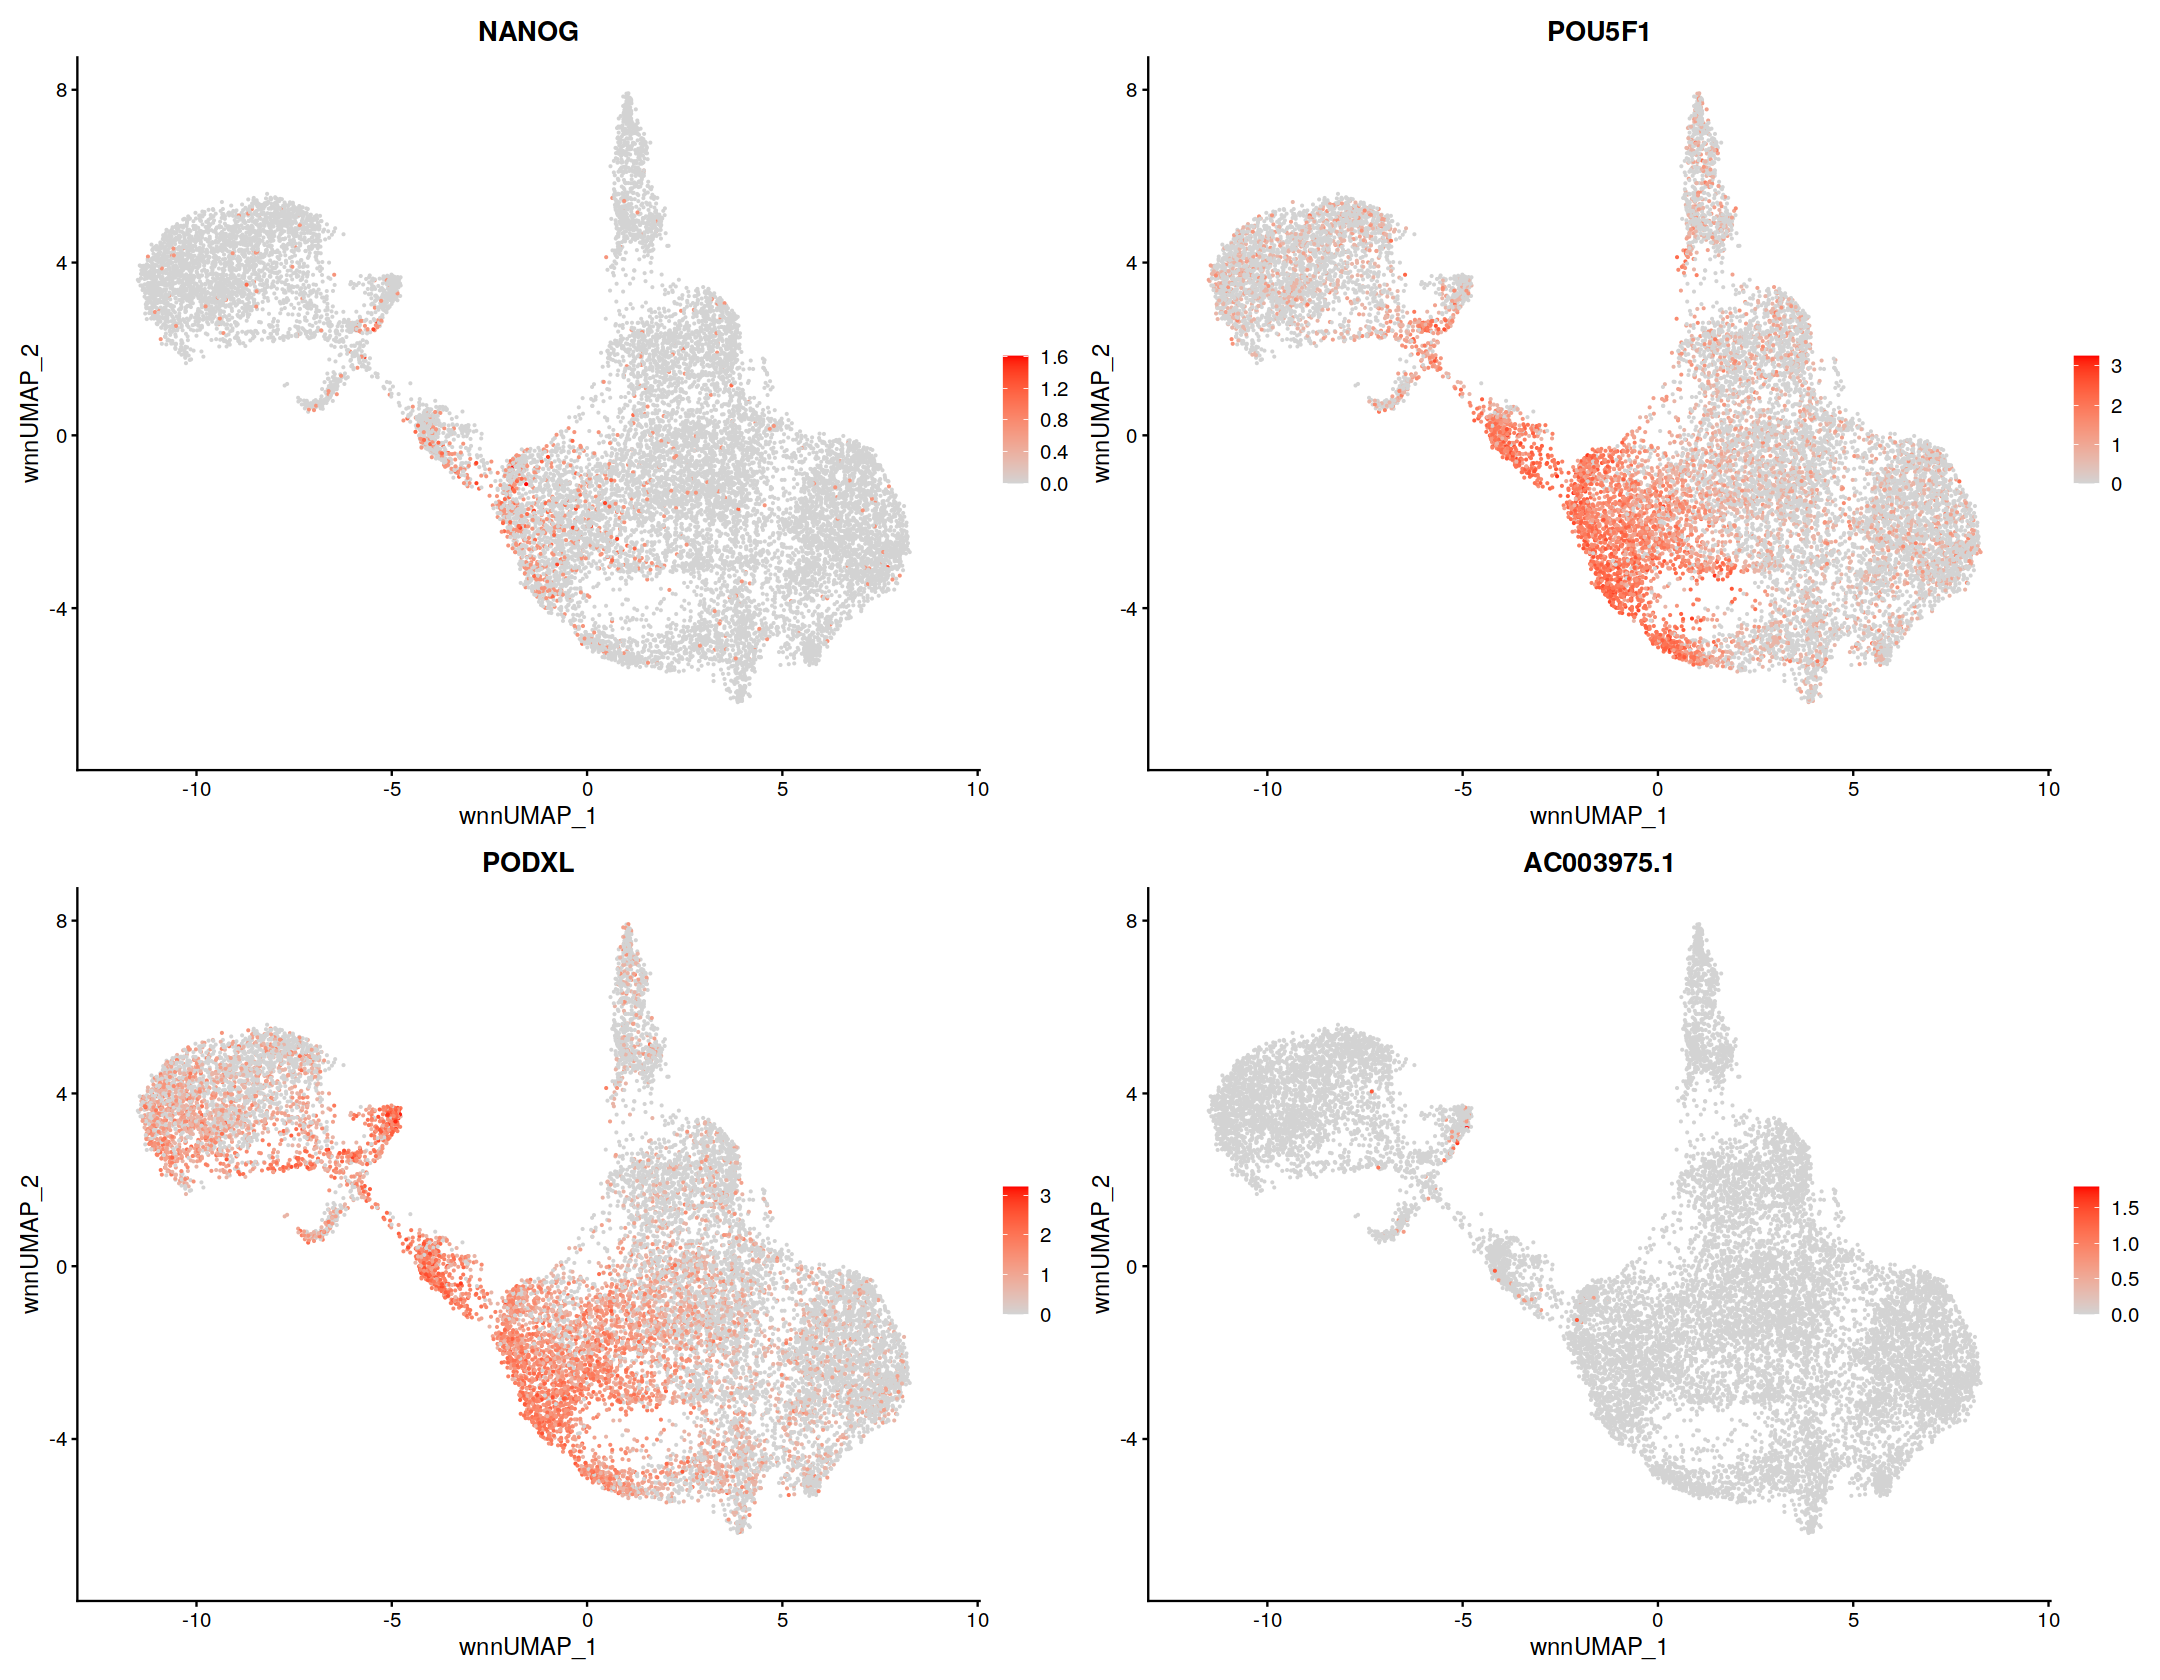

In [ ]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'wnn.umap', cols = c("lightgrey", "red"))
gene_plot_2 <- FeaturePlot(seurat, features = tf.list.2, reduction = 'wnn.umap', cols = c("lightgrey", "red"))
gene_plot
gene_plot_2 

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: NTCTL"


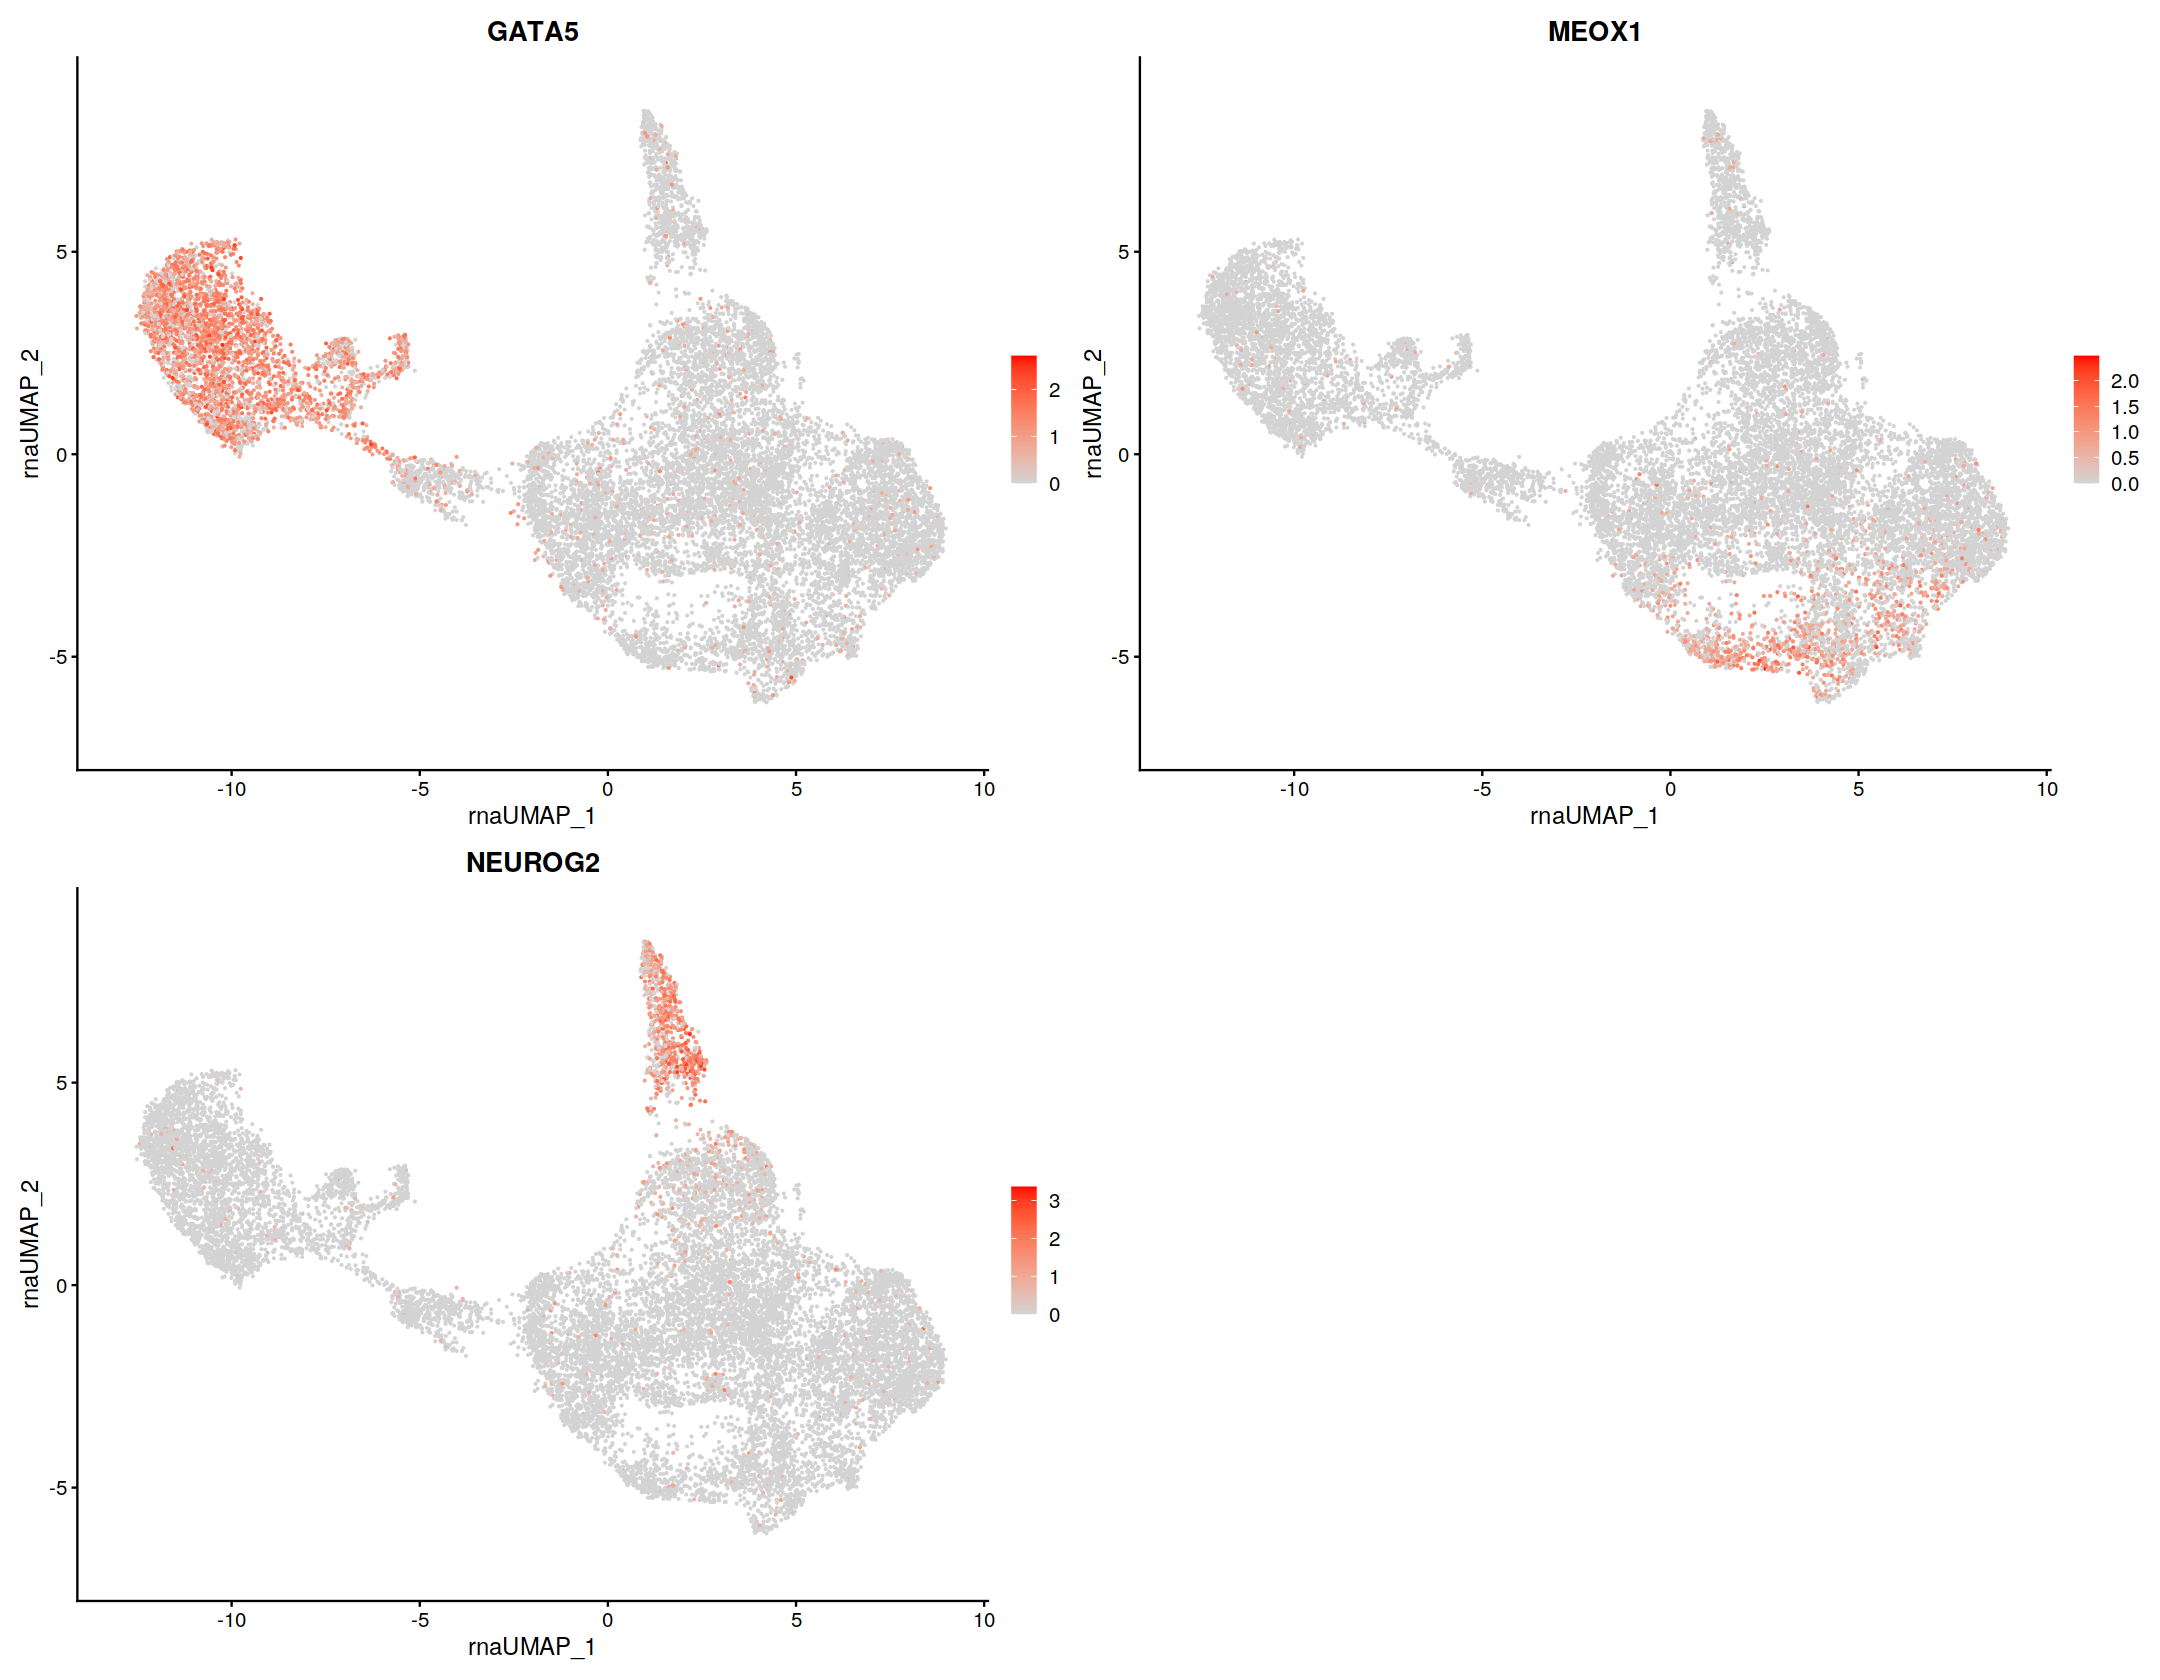

In [ ]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'umap.rna', cols = c("lightgrey", "red"))
gene_plot 

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: NTCTL"


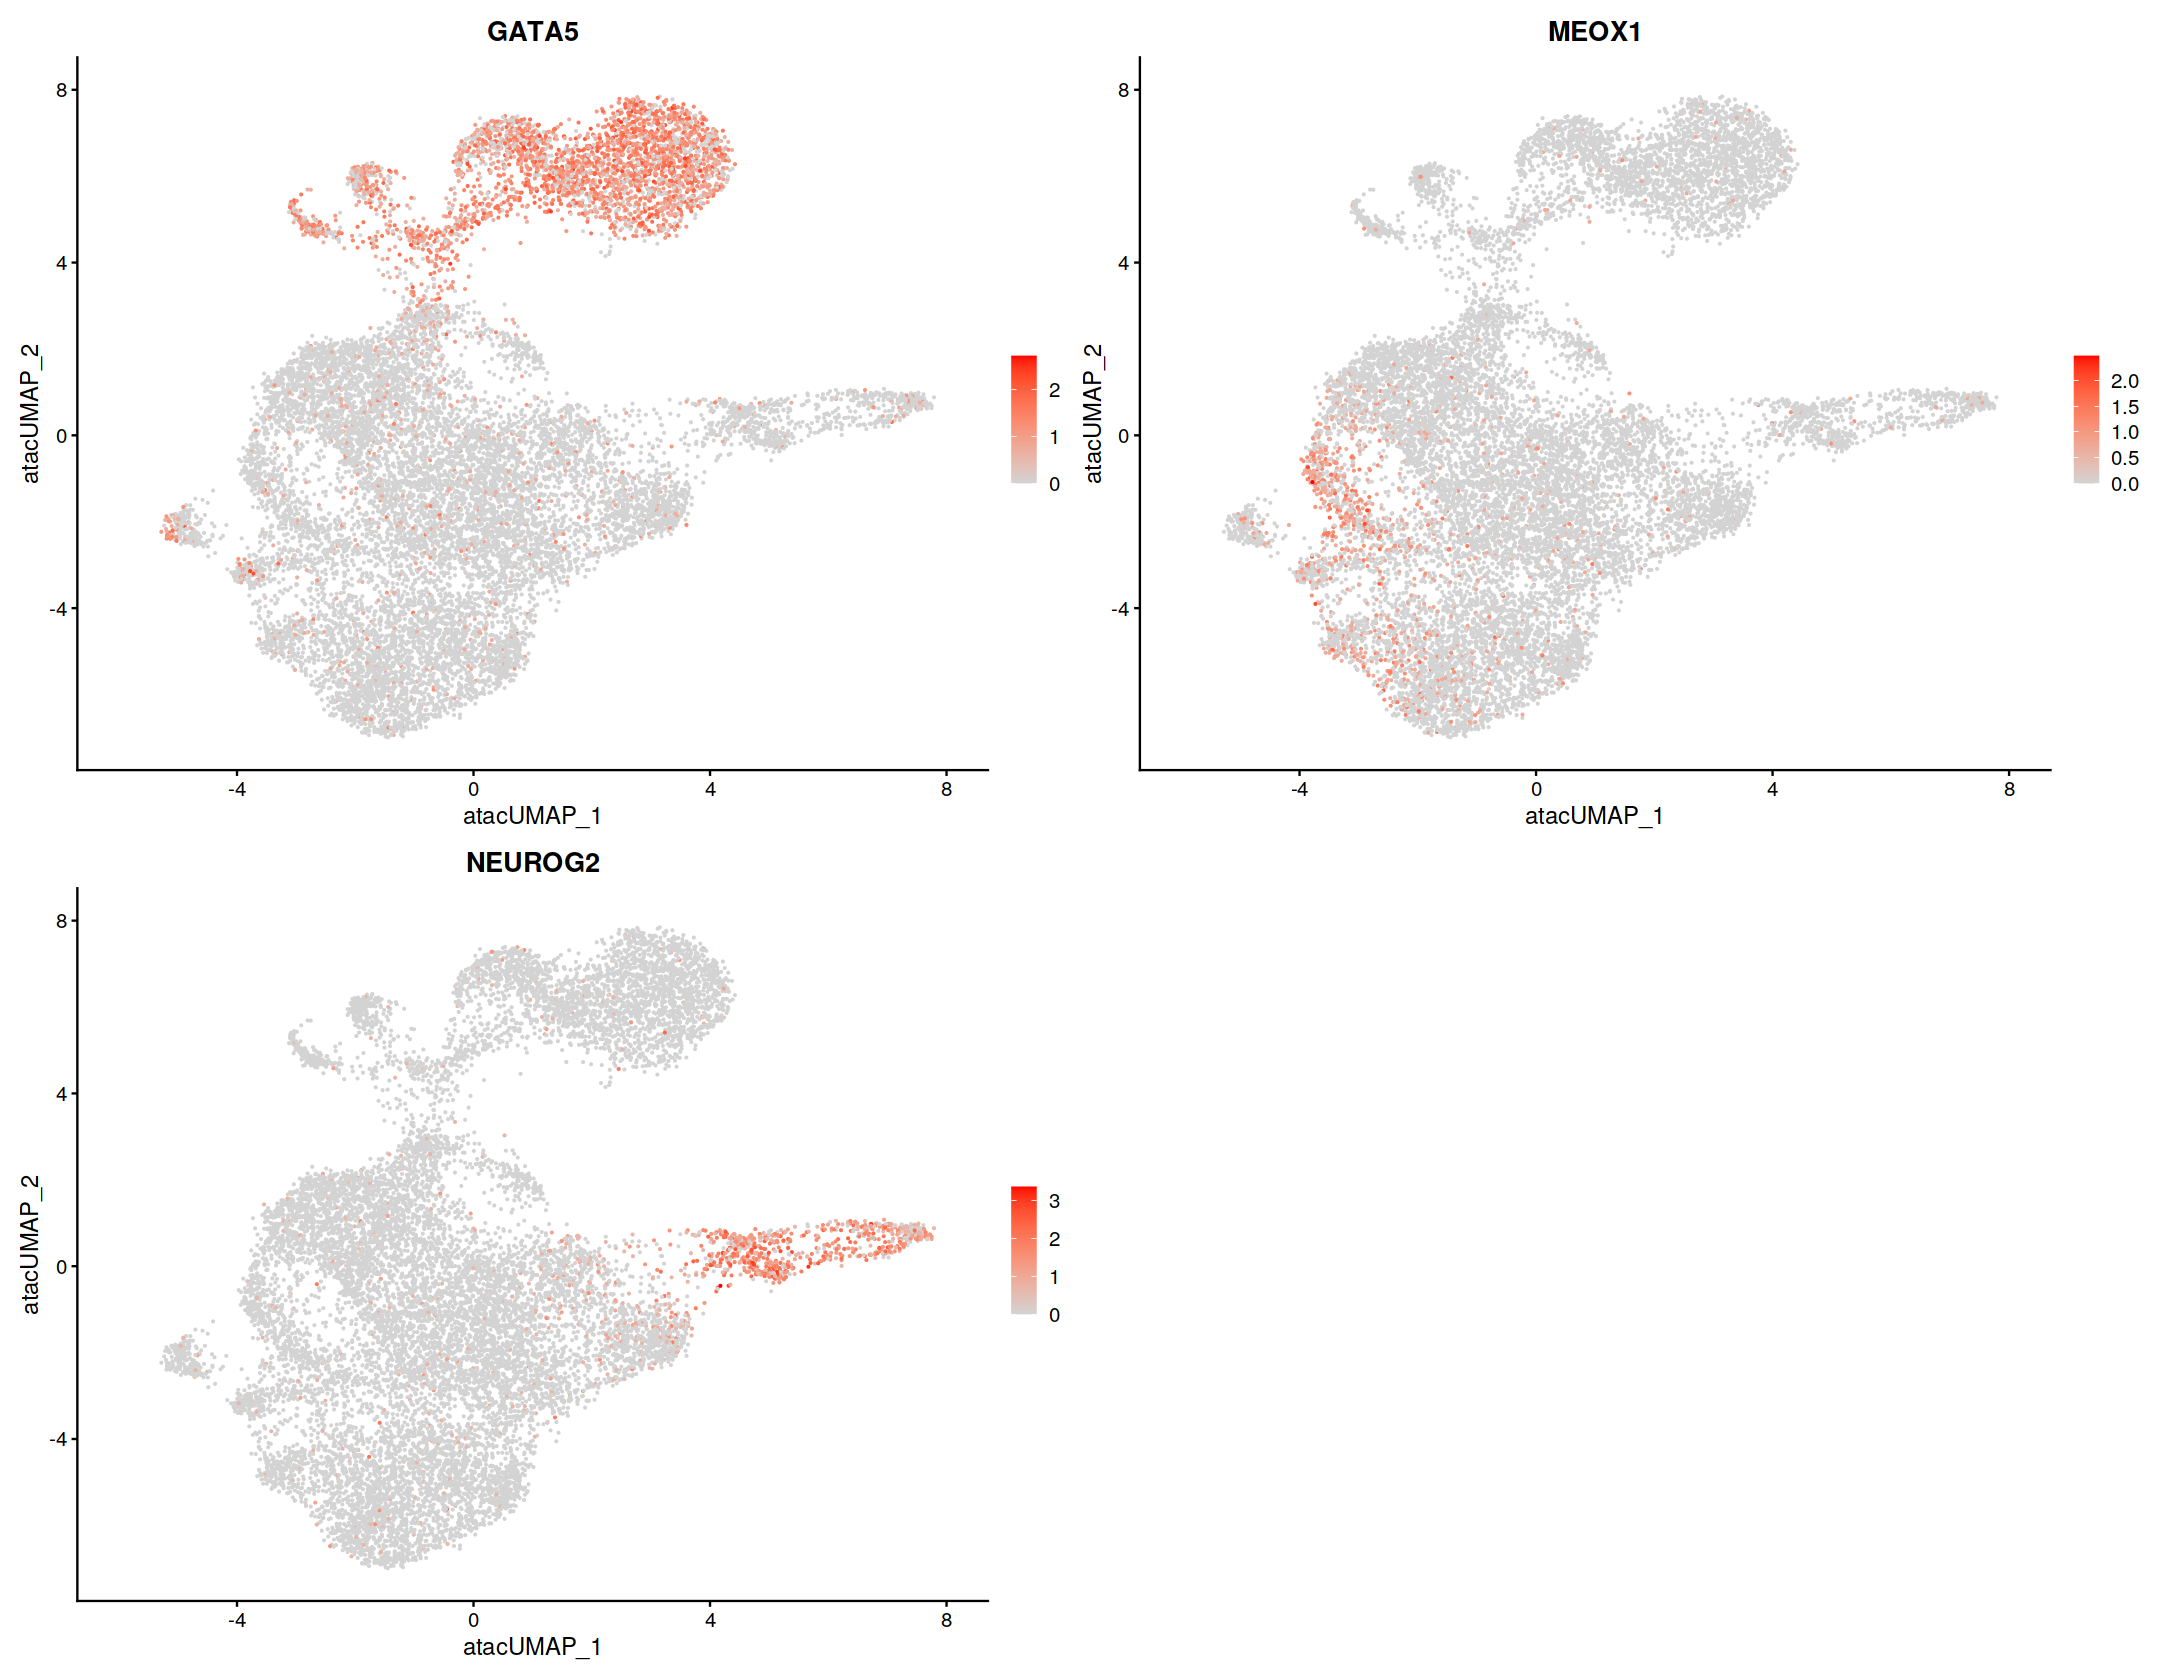

In [ ]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'umap.atac', cols = c("lightgrey", "red"))
gene_plot 

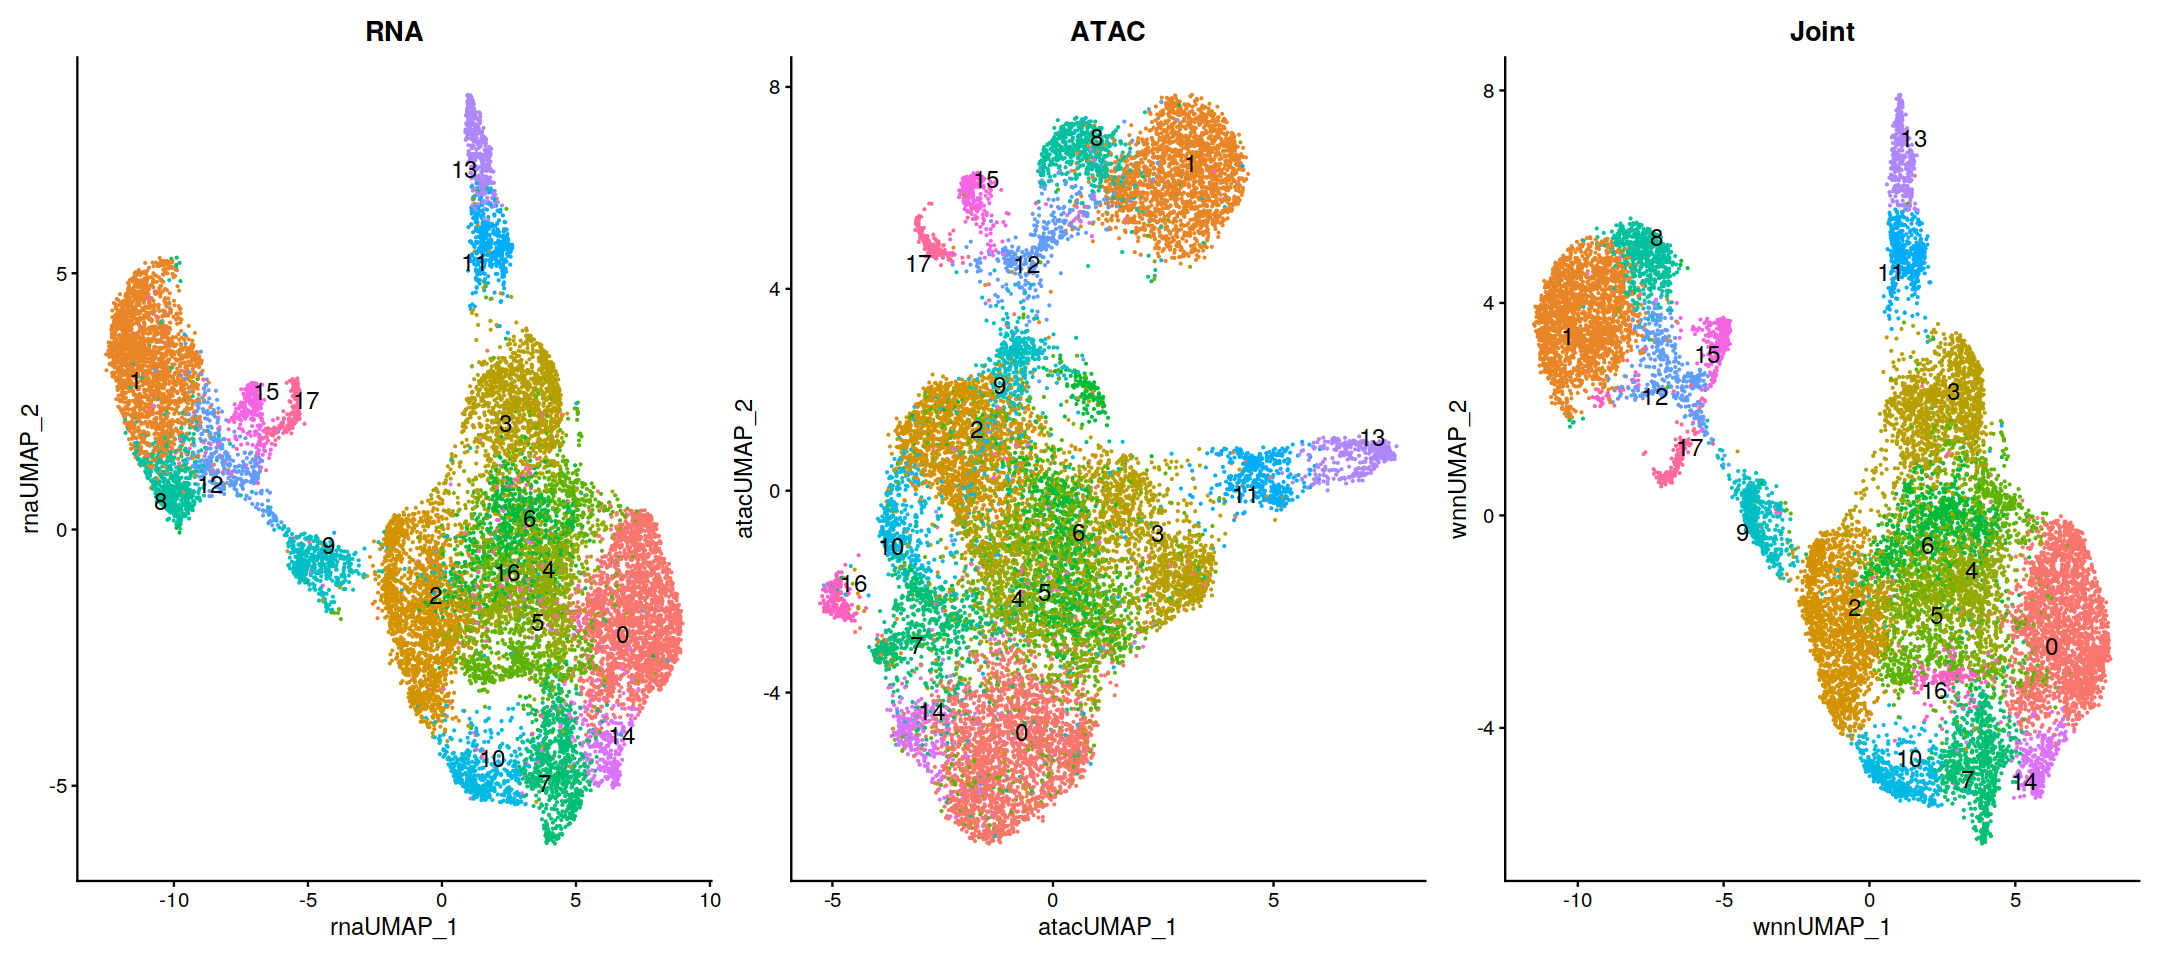

In [ ]:
p1 <- DimPlot(seurat, reduction = "umap.rna",  label = TRUE, label.size = 5, repel = TRUE) + ggtitle("RNA")
p2 <- DimPlot(seurat, reduction = "umap.atac", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("ATAC")
p3 <- DimPlot(seurat, reduction = "wnn.umap",  label = TRUE, label.size = 5, repel = TRUE) + ggtitle("Joint")
options(repr.plot.width=18, repr.plot.height=8)
p1 + p2 + p3 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [ ]:
# add annotations
# seurat <- RenameIdents(seurat, 'GATA5a' = '13' , 'GATA5b' = '16')
# seurat <- RenameIdents(seurat, 'iPSC' = '5')
# seurat <- RenameIdents(seurat, 'MEOX1' = '10')
# seurat <- RenameIdents(seurat, 'NGN2' = '11')

#seurat$celltype <- Idents(seurat)

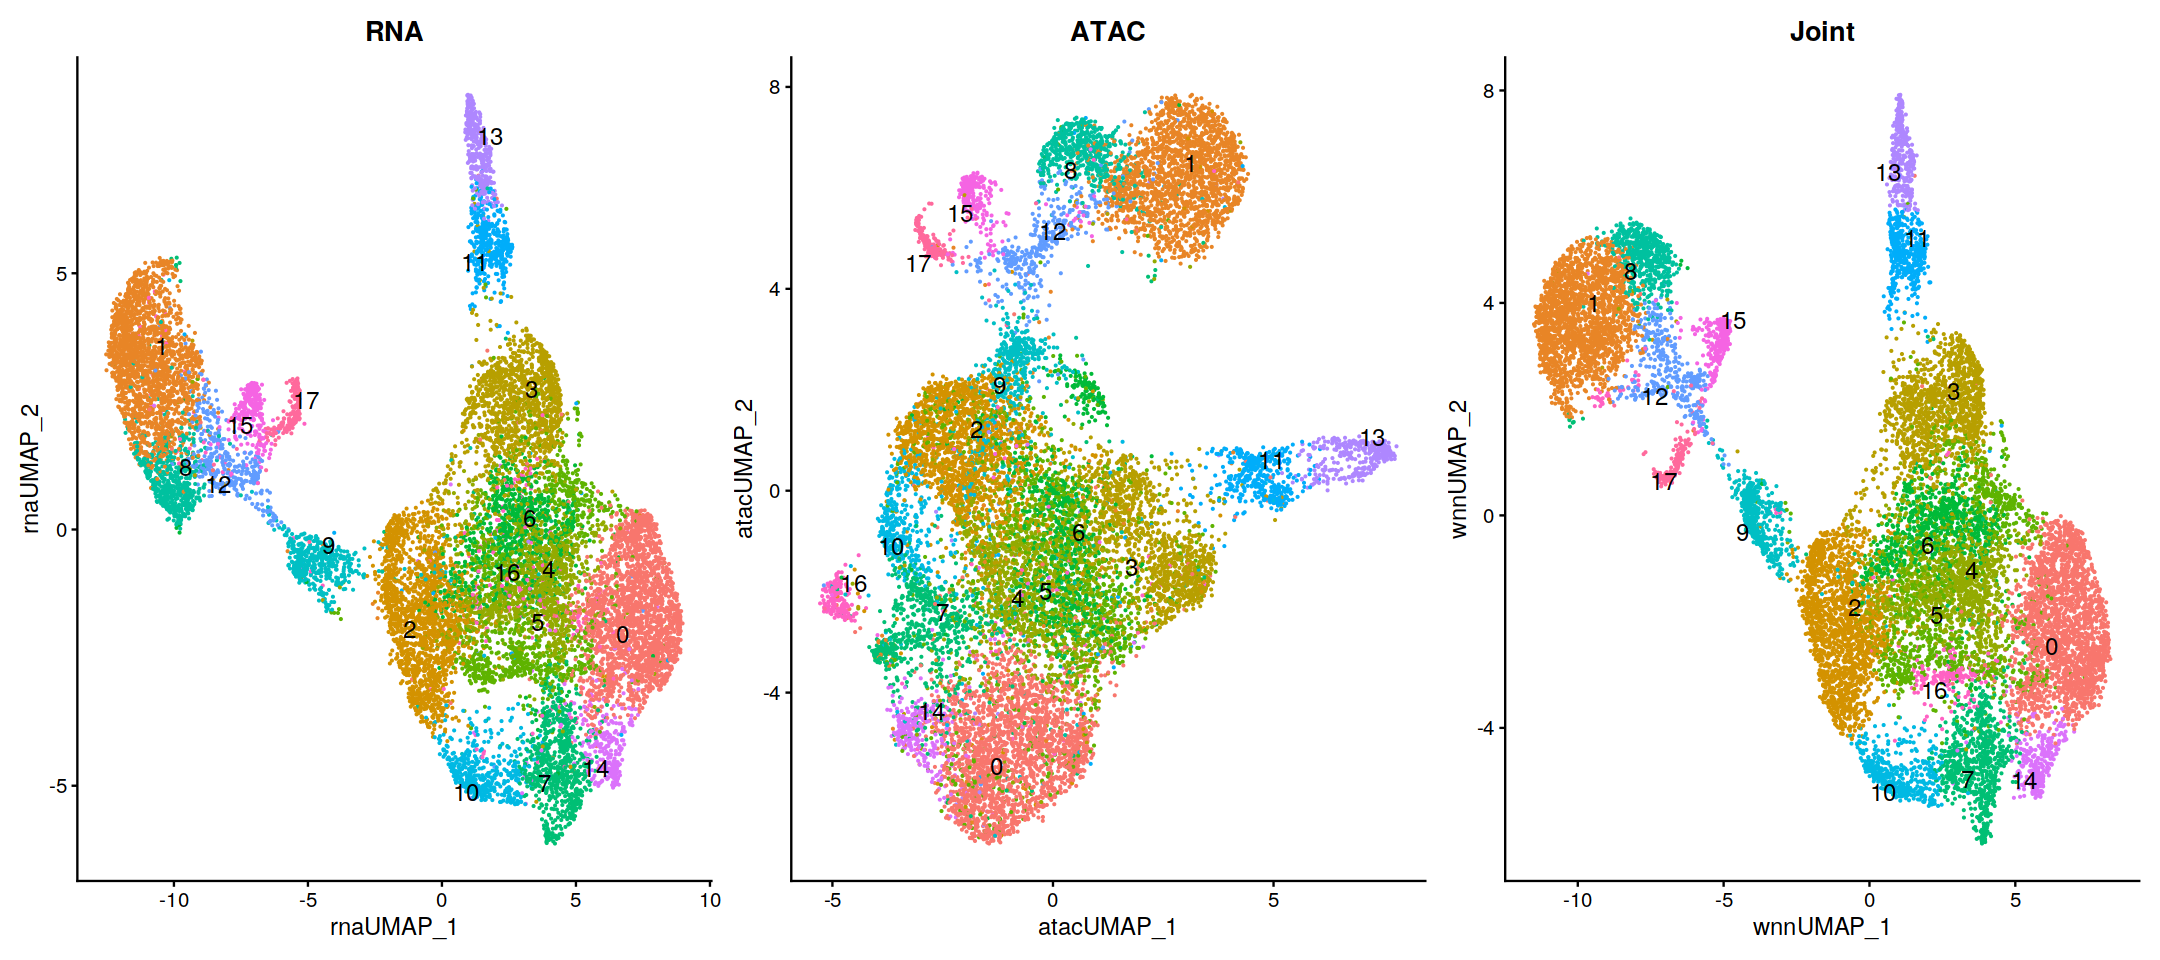

In [ ]:
options(repr.plot.width=12, repr.plot.height=26)
p1 <- DimPlot(seurat, reduction = "wnn.umap", ncol = 3, split.by = 'seurat_clusters' , label = TRUE, label.size = 5, repel = TRUE) + ggtitle("RNA")
p1 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [ ]:
new_h5_name = sub(".rds", "_ONLY_SINGLETS.rds", h5_name)
saveRDS(seurat, new_h5_name)

Warning message:
"Overwriting previous file /home/vsevim/prj/tf/CATATAC_4/analysis/secondary/condition_07/seurat/CATATAC_4_condition_07.h5seurat"
Creating h5Seurat file for version 3.1.5.9900

Adding counts for SCT

Adding data for SCT

Adding scale.data for SCT

Adding variable features for SCT

No feature-level metadata found for SCT

Writing out SCTModel.list for SCT

Adding counts for ATAC

Adding data for ATAC

Adding variable features for ATAC

Adding feature-level metadata for ATAC

Writing out ranges for ATAC

Writing out motifs for ATAC

Writing out fragments for ATAC

Writing out seqinfo for ATAC

Writing out annotation for ATAC

Writing out bias for ATAC

Writing out positionEnrichment for ATAC

Writing out links for ATAC

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding cell embeddings for lsi

Adding loadings for lsi

No projected loadings for lsi

Adding standard deviations for lsi

No JackStra